In [0]:
!pip install seaborn==0.9.0

import seaborn as sns
print(sns.__version__)

0.9.0


In [0]:
# Install necessary libraries
import pandas as pd
import numpy as np
import math as mt
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests


In [0]:
# Read in data
geneData = pd.read_csv('10_13genes.txt', sep="\t")
geneData.head()

4898


In [0]:
# Delete rows that contain invalid insect fitness levels
geneData = geneData[geneData['InsectFitness'] != "#DIV/0!"]

# Convert to strings in dataframe int and float

pd.to_numeric(geneData['Gene'])
pd.to_numeric(geneData['InsectFitness'])

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21        0.000000
22        0.000000
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
           ...    
3256    119.000000
3257    125.000000
3258    128.500000
3259    137.000000
3260    142.000000
3261    148.000000
3262    151.500000
3263    154.500000
3264    160.000000
3265    162.000000
3266    174.000000
3267    177.000000
3268    185.000000
3269    191.000000
3270    193.666667
3271    201.500000
3272    208.000000
3273    215.000000
3274    218.714286
3275    223.000000
3276    224.666667
3277    226.

In [0]:
allGene = []
allFitness = []

fitnessLog = []
top5 = []

# Retrieve fitness information
for i in range(0, len(geneData['InsectFitness'])):
  geneNum = int(geneData['Gene'][i])
  data = float(geneData['InsectFitness'][i])
  allGene.append(geneNum)
  allFitness.append(data)
  log = 0
  if data == 0: # Can't take log(0)
    #log = (mt.log10(data + 0.0001))
    continue
  else:
    log = (mt.log10(data))
  fitnessLog.append(log)
  if log >= .7394: # 5% cutoff
    top5.append(log)
    
allData = pd.DataFrame(list(zip(allGene, allFitness)), columns=['Gene Order', 'Insect Fitness'])


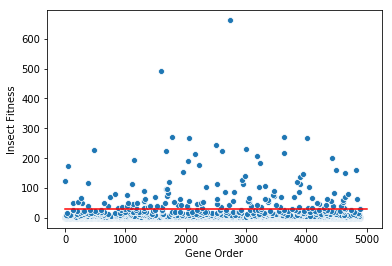

In [0]:
# Plot insect fitness
line = pd.DataFrame(list(zip([0,5000], [30.11,30.11])), columns=['x', 'y'])
sns.lineplot(x=line['x'], y=line['y'], color='red')
sns.scatterplot(allData['Gene Order'],allData['Insect Fitness'])


Define 2 highest points, defining haracteristics
Manhattan Plot
Label axes
p-values (how different they are from avg fitness)
Scatter/Manhattan Plot is better for paper

Histogram as supplement
Use statistical 95% threshold based on histogram

Caption
Figure should be self-explanatory without reading caption
Caption should tell you everything you need to know without looking at paper
Paper should tell you everything you need to know without looking at figure
See rubric

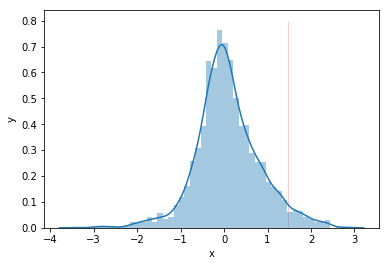

In [0]:
# Plot distribution of log(InsectFitness)
line = pd.DataFrame(list(zip([1.47,1.47], [0,0.8])), columns=['x', 'y'])
sns.lineplot(x=line['x'], y=line['y'], color='red')
sns.distplot(fitnessLog)

In [0]:
# Calculate mean/standard deviation of log(insectFitness) distribution
fitnessSD = np.std(fitnessLog)
fitnessMean = np.mean(fitnessLog)
print(len(fitnessLog))
print(fitnessMean)
print(fitnessSD)
print(2 * fitnessSD)
print(np.percentile(fitnessLog, 90))

3134
0.08813376478002459
0.7394243496553878
1.4788486993107757
1.048427291023625


2 standard deviations would be 1.4788, or a fitness score of 30.11
So, the top 5% genes have a fitneses score of at least 175.35

Using a t-test, we can say with 95% confidence that these values are significantly different from the mean of the distribution.

In [0]:
#T-Test to determine if top 5% are significant

t, p = stats.ttest_1samp(top5,fitnessMean)
print(t)
print(p)

63.103621999791876
1.5191744104699993e-250


In [0]:
# Bonferroni Correction
numTests = 4898
pAdjusted = p * numTests
print(p_adjusted)


3.720458131241028e-247
